# Pyber Analysis

## Trends:

* According to the 'Pyber Ride-Sharing Data (2018)', the average fare for rural cities shows steeper prices than the fares seen in suburban or urban cities. As urban city maps are more compact while rural cities are more spread out, distance is a significant reason for determining fares. 
* Among the three city types, urban cities deem more profitable. 
* Nearly 81% of drivers come from urban cities, which shows that the demand for drivers in urban cities are higher than compared to suburban or rural cities. 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")

In [2]:
# Display the data table for preview
combined_data = combined_data[["city", "date", "fare", "ride_id", "driver_count", "type"]]
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

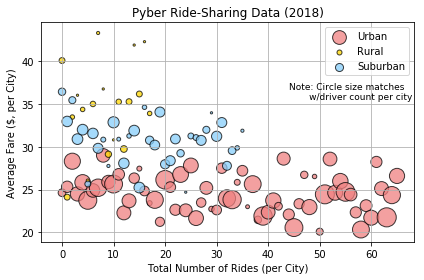

In [3]:
# Obtain the x and y coordinates for each of the three city types

#URBAN CITY COORDINATES
urbancities = combined_data.loc[combined_data["type"] == "Urban",:]
urbancities_mean = urbancities.groupby(["city"]).mean()

x_urban = urbancities["city"].value_counts()
y_urban = urbancities_mean["fare"]
z_urban = urbancities_mean["driver_count"]

x_urban_axis = np.arange(0, len(x_urban), 1)

#RURAL CITY COORDINATES
ruralcities = combined_data.loc[combined_data["type"] == "Rural",:]
ruralcities_mean = ruralcities.groupby(["city"]).mean()

x_rural = ruralcities["city"].value_counts()
y_rural = ruralcities_mean["fare"]
z_rural = ruralcities_mean["driver_count"]

x_rural_axis = np.arange(0, len(x_rural), 1)

#SUBURBAN CITY COORDINATES
suburbancities = combined_data.loc[combined_data["type"] == "Suburban",:]
suburbancities_mean = suburbancities.groupby(["city"]).mean()

x_suburban = suburbancities["city"].value_counts()
y_suburban = suburbancities_mean["fare"]
z_suburban = suburbancities_mean["driver_count"]

x_suburban_axis = np.arange(0, len(x_suburban), 1)

# Build the scatter plots for each city types
urbanscatter = plt.scatter(x_urban_axis, y_urban, s=z_urban*5,
            marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
ruralscatter = plt.scatter(x_rural_axis, y_rural, s=z_rural*5,
            marker="o", facecolors="gold", edgecolors="black", alpha=0.75)
suburbanscatter = plt.scatter(x_suburban_axis, y_suburban, s=z_suburban*5,
            marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride-Sharing Data (2018)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($, per City)")
plt.grid()
plt.tight_layout()

# Create a legend
plt.legend((urbanscatter, ruralscatter, suburbanscatter), ('Urban', 'Rural', 'Suburban'))

# Incorporate a text label regarding circle size
plt.text(44, 35.5, "Note: Circle size matches\n       w/driver count per city", fontsize=9)

# Save Figure
plt.savefig("pyber_bubble_plot.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

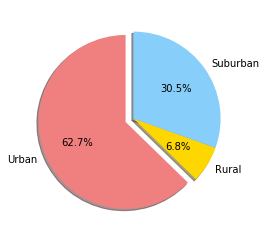

In [5]:
# Calculate Type Percents
urbantotalfare = combined_data.loc[combined_data["type"] == "Urban","fare"].sum()
ruraltotalfare = combined_data.loc[combined_data["type"] == "Rural","fare"].sum()
suburbantotalfare = combined_data.loc[combined_data["type"] == "Suburban","fare"].sum()

citytype = ["Urban", "Rural", "Suburban"]
totalfare = [urbantotalfare, ruraltotalfare, suburbantotalfare]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1,0,0)

# Build Pie Chart
plt.pie(totalfare, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Save Figure
plt.savefig("totalfares_pieplot.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

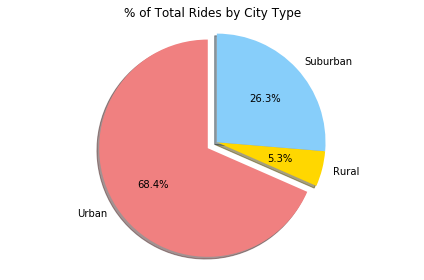

In [7]:
# Calculate Ride Percents
urbanridecount = combined_data.loc[combined_data["type"] == "Urban","ride_id"].count()
ruralridecount = combined_data.loc[combined_data["type"] == "Rural","ride_id"].count()
suburbanridecount = combined_data.loc[combined_data["type"] == "Suburban","ride_id"].count()

citytype = ["Urban", "Rural", "Suburban"]
ridecount = [urbanridecount, ruralridecount, suburbanridecount]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1,0,0)

# Build Pie Chart
plt.pie(ridecount, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.tight_layout()

# Save Figure
plt.savefig("totalrides_pieplot.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

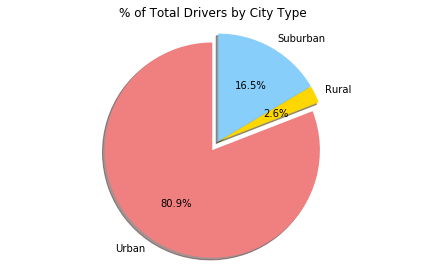

In [9]:
# Calculate Driver Percents
urbantotaldrivers = city_data.loc[city_data["type"] == "Urban","driver_count"].sum()
ruraltotaldrivers = city_data.loc[city_data["type"] == "Rural","driver_count"].sum()
suburbantotaldrivers = city_data.loc[city_data["type"] == "Suburban","driver_count"].sum()

citytype = ["Urban", "Rural", "Suburban"]
totaldrivers = [urbantotaldrivers, ruraltotaldrivers, suburbantotaldrivers]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1,0,0)

# Build Pie Charts
plt.pie(totaldrivers, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.tight_layout()

# Save Figure
plt.savefig("totaldrivers_pieplot.png")

In [10]:
# Show Figure
plt.show()